# Leaves Classification

### CNN MODEL

In [1]:
import os #path information
import splitfolders #split folders

In [ ]:
input_folder=r"C:\Users\hp\OneDrive\Pictures\PROJECT\Medicinal Leaf Dataset\Segmented Medicinal Leaf Images"
input_folder=r"C:\Users\hp\OneDrive\Pictures\PROJECT\Medicinal Leaf Dataset\splitter"

In [ ]:
# split folder into train and validation
splitfolders.ratio(input_folder,output=input_folder,seed=42,ratio=(.8,.2))

Copying files: 0 files [00:00, ? files/s]


In [ ]:
# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator
# Rescaling
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
# load image from train folder into training_set
train_set = train_datagen.flow_from_directory(r"C:\Users\hp\OneDrive\Pictures\PROJECT\Medicinal Leaf Dataset\splitter\train",
                                                 target_size = (64, 64), # image size reduce
                                                 batch_size = 32, # group
                                                 class_mode='categorical') 
# load image from val folder into test_set
test_set = test_datagen.flow_from_directory(r"C:\Users\hp\OneDrive\Pictures\PROJECT\Medicinal Leaf Dataset\splitter\val",
                                            target_size = (64, 64),
                                            batch_size = 32,class_mode='categorical') 

Found 532 images belonging to 15 classes.
Found 201 images belonging to 15 classes.


In [ ]:
# This is not used. This is just for train and test classification. 

In [2]:
# Importing the Keras libraries and packages
from keras.models import Sequential # Model
from keras.layers import Convolution2D # reduce size of image and extract information from input
from keras.layers import MaxPooling2D # control overfitting and reduce training time
from keras.layers import Flatten # convert 3D image to 1D vector
from keras.layers import Dense #4 FULLY CONNECTED LAYER and OUTPUT layer
from keras.layers import Dropout,BatchNormalization # Normalization, prevent overfit

In [3]:
# Initialising the CNN
classifier = Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu',padding='same'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2))) # AVERAGE = FILTER HIGHER NUMBER 
classifier.add(Dropout(.2))
classifier.add(Convolution2D(32, 3, 3, activation = 'relu',padding='same'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.2))
classifier.add(Flatten())  
classifier.add(Dense(units = 128, activation = 'relu'))  # hidden layer 1
classifier.add(Dense(units = 64, activation = 'relu')) # hidden layer 2

In [4]:
import cv2 #add images
import numpy as np
from keras.utils import to_categorical #Converts a class vector to binary class matrix
from sklearn.model_selection import train_test_split #split train and test data

In [5]:
# Here are we using train and test split

In [6]:
data_dir = r"C:\Users\hp\OneDrive\Pictures\PROJECT\Medicinal Leaf Dataset\Segmented Medicinal Leaf Images" #images stored
categories = os.listdir(data_dir)
image_paths = []
labels = []

# Load images and extract labels
for category_id, category in enumerate(categories):
    category_folder = os.path.join(data_dir, category)
    for image_name in os.listdir(category_folder):
        image_path = os.path.join(category_folder, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (64, 64))  # Resize images if needed
        image_paths.append(image)
        labels.append(category_id)

# Convert lists to numpy arrays
image_paths = np.array(image_paths)
labels = np.array(labels)

In [7]:
# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

In [8]:
# Preprocess images (you might need to normalize or scale the pixel values here)
x_train = x_train.astype('float32') / 255.0  # Normalize pixel values between 0 and 1
x_test = x_test.astype('float32') / 255.0

# Reshape images to match the input shape of the model
x_train = x_train.reshape(-1, 64, 64, 3)
x_test = x_test.reshape(-1, 64, 64, 3)

In [9]:
# Convert labels to one-hot encoded vectors
num_classes = len(categories)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)
# how many leaf types 
num_classes = len(categories)

In [10]:
# Output layer with units=num_classes
classifier.add(Dense(units=num_classes, activation='softmax'))

In [11]:
# Compile the model
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# prevent overfit and reduce training process if validation data not improving
from tensorflow.keras.callbacks import EarlyStopping as ES
Regularizer=ES(monitor='val_loss',patience=20,min_delta=.001,restore_best_weights=True,baseline=None,mode='auto',verbose=1)

In [13]:
# fit model
classifier.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),callbacks=Regularizer)

Epoch 1/100
17/17 [==============================] - 2s 36ms/step - loss: 2.3712 - accuracy: 0.1720 - val_loss: 2.2571 - val_accuracy: 0.2463
Epoch 2/100
17/17 [==============================] - 0s 19ms/step - loss: 1.9619 - accuracy: 0.3196 - val_loss: 2.2390 - val_accuracy: 0.2537
Epoch 3/100
17/17 [==============================] - 0s 19ms/step - loss: 1.6074 - accuracy: 0.4785 - val_loss: 2.2116 - val_accuracy: 0.2836
Epoch 4/100
17/17 [==============================] - 0s 19ms/step - loss: 1.2121 - accuracy: 0.5907 - val_loss: 2.1745 - val_accuracy: 0.1418
Epoch 5/100
17/17 [==============================] - 0s 20ms/step - loss: 0.9094 - accuracy: 0.6972 - val_loss: 2.1260 - val_accuracy: 0.1567
Epoch 6/100
17/17 [==============================] - 0s 19ms/step - loss: 0.8002 - accuracy: 0.7234 - val_loss: 2.0722 - val_accuracy: 0.1119
Epoch 7/100
17/17 [==============================] - 0s 19ms/step - loss: 0.6156 - accuracy: 0.7907 - val_loss: 1.9827 - val_accuracy: 0.3955
Epoch 

### Accuracy

In [14]:
loss,accuracy=classifier.evaluate(x_test,y_test)
print('Test accuracy : ',100*accuracy)

5/5 [==============================] - 0s 5ms/step - loss: 0.2092 - accuracy: 0.9403
Test accuracy :  94.02984976768494


In [15]:
loss,accuracy=classifier.evaluate(x_train,y_train)
print('Train accuracy : ',accuracy*100)

17/17 [==============================] - 0s 6ms/step - loss: 0.0207 - accuracy: 0.9981
Train accuracy :  99.81308579444885


In [17]:
# listing the clases
class_labels = categories

In [18]:
import matplotlib.pyplot as plt #visualization

In [19]:
# predict leaf name when path is given
def predict_leaf(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (64, 64))
    image=np.array(image)
    image=np.expand_dims(image,axis=0)
    image = image/ 255.0
    probability = classifier.predict(image)[0] # probabilities for all classes
    predicted_class_index =  np.argmax(probability) # Get the index 
    print('Probability:', probability[0])
    predicted_class = class_labels[predicted_class_index]  # Get the label using the index
    plt.title(predicted_class)
    plt.imshow(cv2.imread(path))


1/1 [==============================] - 0s 236ms/step
Probability: 9.8462315e-06


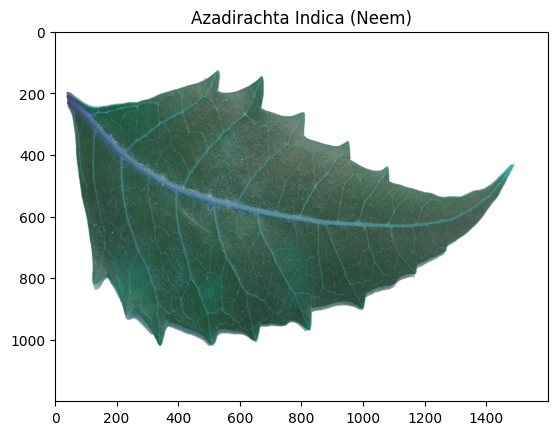

In [20]:
predict_leaf(r"C:\Users\hp\OneDrive\Pictures\PROJECT\Medicinal Leaf Dataset\Segmented Medicinal Leaf Images\Azadirachta Indica (Neem)\AI-S-004.jpg")

1/1 [==============================] - 0s 42ms/step
Probability: 9.5478745e-06


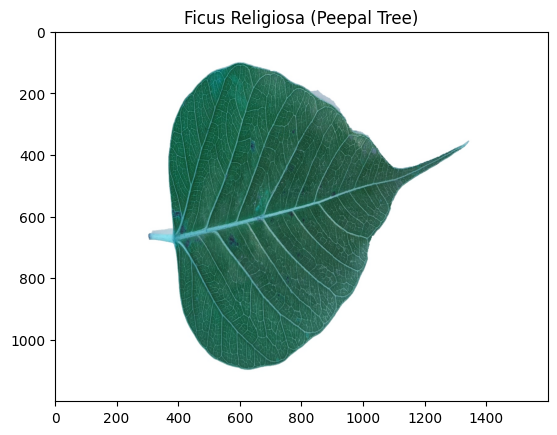

In [21]:
predict_leaf(r"C:\Users\hp\OneDrive\Pictures\PROJECT\Medicinal Leaf Dataset\Segmented Medicinal Leaf Images\Ficus Religiosa (Peepal Tree)\FR-S-005.jpg")

A bunch of leaf images are given. The main problem faced in the project, when try to split folder for train and test

Used different layers, normalizer, regularizer methods to build the model.

Model accuracy was not bad.
There for used the model to predict the class of newly entered leaf image path

## Finished